In [1]:

import numpy as np
# import matplotlib.pyplot as plt

import random
import pickle as pkl
import gzip

import games
import synthetic_data
import evaluator

import neuralcbp_EE_kclasses_v6
import ineural_multi
import neuronal
import margin_based
import cesa_bianchi

In [2]:
case = 'case1' 
model = 'MLP'
approach = 'cesa'
context_type = 'MNISTbinary'
n_folds = 1
horizon = 9999
seed = 1

if case == 'case1':
    game = games.game_case1( {} )

elif case == 'case1b':
    game = games.game_case1b( {} )

elif case == 'case1c':
    game = games.game_case1c( {} )

elif case == 'case2':
    game = games.game_case2( {} )
elif case == 'case3':
    game = games.game_case3( {} )
elif case == 'case4':
    game = games.game_case4( {} )
elif case == 'game_case_seven':
    game = games.game_case_seven( {} )
elif case == 'game_26':
    game = games.game_26( {} )
elif case == 'case4b':
    game = games.game_case4b( {} )

eval = evaluator.Evaluation(case, model, n_folds, horizon, game, approach, context_type)
eval.set_random_seeds(seed)


#################################### CONTEXT GENERATOR:

######## binary tasks

if context_type == 'MNISTbinary':
    context_generator = synthetic_data.MNISTcontexts_binary(eval)
    context_generator.initiate_loader()


elif context_type == 'adult':
    data = synthetic_data.Bandit_multi('adult') 
    context_generator = synthetic_data.CustomContexts(eval)
    context_generator.initiate_loader(data.X, data.y)
    

elif context_type == 'MagicTelescope':
    data = synthetic_data.Bandit_multi('MagicTelescope') 
    context_generator = synthetic_data.CustomContexts(eval)
    context_generator.initiate_loader(data.X, data.y)

############ 10-classes tasks

elif context_type == 'MNIST':
    context_generator = synthetic_data.MNISTcontexts(eval)
    context_generator.initiate_loader()

elif context_type == 'FASHION':
    context_generator = synthetic_data.FashionMNISTContexts(eval)
    context_generator.initiate_loader()

elif context_type == 'CIFAR10':
    context_generator = synthetic_data.CIFAR10Contexts(eval)
    context_generator.initiate_loader()

# elif context_type == 'LETTERS':
#     context_generator = synthetic_data.EMNISTcontexts(eval)
#     context_generator.initiate_loader()

############# other tasks:

elif context_type == 'covertype':
    data = synthetic_data.Bandit_multi('covertype') 
    context_generator = synthetic_data.CustomContexts(eval)
    context_generator.initiate_loader(data.X, data.y)

elif context_type == 'shuttle':
    data = synthetic_data.Bandit_multi('shuttle') 
    context_generator = synthetic_data.CustomContexts(eval)
    context_generator.initiate_loader(data.X, data.y)

    

#################################### AGENT:

m = 100
nclasses = game.M

# if approach == 'EEneuralcbpside_v2':
#     alg = neuralcbp_EE_kclasses_v2.CBPside( game, 1.01, m, nclasses,  'cuda:0')
# elif approach == 'EEneuralcbpside_v3':
#     alg = neuralcbp_EE_kclasses_v3.CBPside( game, 1.01, m, nclasses,  'cuda:0')
# elif approach == 'EEneuralcbpside_v4':
#     alg = neuralcbp_EE_kclasses_v4.CBPside( game, 1.01, m, nclasses,  'cuda:0')
# elif approach == 'EEneuralcbpside_v5':
#     alg = neuralcbp_EE_kclasses_v5.CBPside( game, 1.01, m, nclasses,  'cuda:0')


if approach == 'EEneuralcbpside_v6':
    alg = neuralcbp_EE_kclasses_v6.CBPside( game, context_type, eval.model, 1.01, m, nclasses,  'cuda:0')

# elif approach == 'ineural3':
#     budget = eval.horizon
#     margin = 3
#     alg = ineural_multi.INeurALmulti(budget, nclasses, margin, m, 'cuda:0')

elif approach == 'ineural6':
    budget = eval.horizon
    margin = 6
    alg = ineural_multi.INeurALmulti(budget, nclasses, margin, m, 'cuda:0')



elif approach == 'neuronal3':
    budget = eval.horizon
    margin = 3
    alg = neuronal.NeuronAL(eval.model,context_type, budget, nclasses, margin, True, m,'cuda:0')

elif approach == 'neuronal6':
    budget = eval.horizon
    margin = 6
    alg = neuronal.NeuronAL(eval.model,context_type,  budget, nclasses, margin, True, m, 'cuda:0')

elif approach == 'neuronal6loss':
    budget = eval.horizon
    margin = 6
    alg = neuronal.NeuronAL(eval.model,context_type,  budget, nclasses, margin, False, m, 'cuda:0')

# if approach == 'margin':
#     threshold = 0.1
#     alg = margin_based.MarginBased(game, m, threshold,  'cuda:0')

elif approach == 'cesa':
    alg = cesa_bianchi.CesaBianchi(game, m, 'cuda:0')

alg.reset(context_generator.d)

3


In [2]:
case = 'case2' 
model = 'LeNet'
approach = 'EEneuralcbpside_v6'
context_type = 'CIFAR10'
n_folds = 1
horizon = 9999
seed = 1

if case == 'case1':
    game = games.game_case1( {} )

elif case == 'case1b':
    game = games.game_case1b( {} )

elif case == 'case1c':
    game = games.game_case1c( {} )

elif case == 'case2':
    game = games.game_case2( {} )
elif case == 'case3':
    game = games.game_case3( {} )
elif case == 'case4':
    game = games.game_case4( {} )
elif case == 'game_case_seven':
    game = games.game_case_seven( {} )
elif case == 'game_26':
    game = games.game_26( {} )
elif case == 'case4b':
    game = games.game_case4b( {} )

eval = evaluator.Evaluation(case, model, n_folds, horizon, game, approach, context_type)
eval.set_random_seeds(seed)

context_generator = synthetic_data.CIFAR10Contexts(eval)
context_generator.initiate_loader()

Files already downloaded and verified
Files already downloaded and verified


In [3]:
job = context_generator, alg 
r = eval.eval_policy_once(game, job)

0
torch.Size([1, 784])
 
norm hist 0 current norm 0.9999998
prediction tensor([[-0.8919]]) proba 0.290719867977263 prediction 1
b 0.9999996423721633 probability 0.7747613903360314
t 0 action 0 outcome 1 regret 1
torch.Size([1, 784])
 
norm hist 0 current norm 0.99999994
prediction tensor([[-3.1356]]) proba 0.04166061160023107 prediction 1
b 0.999999880790714 probability 0.9600055758046399
t 1 action 1 outcome 0 regret 0
torch.Size([1, 784])
 
norm hist 0 current norm 0.99999994
prediction tensor([[-0.8673]]) proba 0.2958247505852149 prediction 1
b 0.999999880790714 probability 0.7717092703577465
t 2 action 2 outcome 1 regret 0
torch.Size([1, 784])
 
norm hist 0 current norm 0.99999994
prediction tensor([[-2.1909]]) proba 0.10057032231746255 prediction 1
b 0.999999880790714 probability 0.9086198026864286
t 3 action 1 outcome 0 regret 0
torch.Size([1, 784])
 
norm hist 0 current norm 0.9999998
prediction tensor([[-1.0807]]) proba 0.2533712857869343 prediction 1
b 0.9999996423721633 proba

In [9]:
import torch
from scipy.special import logit, expit
a = torch.tensor([[-2.7359]]).item()
expit(a)

0.060887926335568686

In [40]:
import torch
b = 1
p = torch.tensor([[0.9997]])
# p = b / ( b + abs( probability ) )


Z = np.random.binomial(1, p)
Z = 1-Z
print('probability', p, Z)
if Z == 1:
    action = 0


probability tensor([[0.9997]]) [[0]]


In [4]:
X, y = context_generator.get_test_data()
X = X.to('cuda:0')

In [5]:
import torch
y_probas = alg.predictor(X,y)
# y_pred = torch.argmax( y_probas, 1 ).tolist()
# sum(y_pred)

In [8]:
y_pred = torch.argmax( y_probas, 1 ).tolist()
sum(y_pred)

339

In [10]:
transformed_probas = torch.cat((y_probas, 1 - y_probas), dim=1)

# Show the transformed tensor
print(transformed_probas)

tensor([[0.7506, 0.2494],
        [0.7650, 0.2350],
        [0.7663, 0.2337],
        ...,
        [0.7188, 0.2812],
        [0.7665, 0.2335],
        [0.7659, 0.2341]])


In [5]:
alg.X.shape

torch.Size([1, 1, 28, 28])

In [4]:
r['pred']

{50: {'accuracy': 0.7526, 'f1': 0.7406066009559414},
 100: {'accuracy': 0.8611, 'f1': 0.8609458263293959},
 500: {'accuracy': 0.9362, 'f1': 0.936088520125452}}

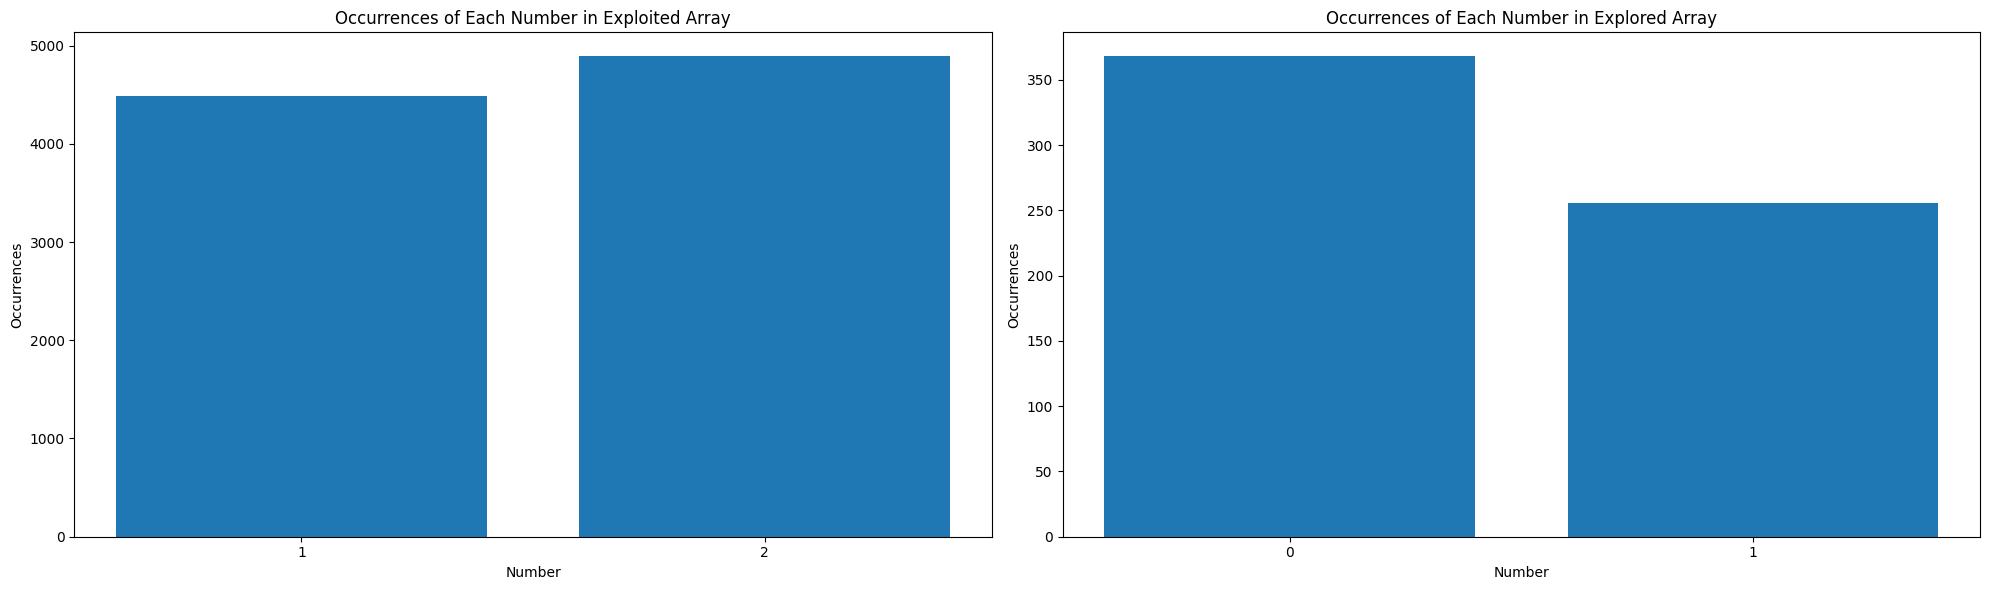

In [4]:
from collections import Counter

explored = np.array( [ i for i in r['history'] if i[0]==0 ] )
exploited = np.array( [ i for i in r['history'] if i[0]!=0  ] )

# Counting the occurrences of each number for 'exploited'
counts_exploited = Counter(exploited[:,0])
numbers_exploited = list(counts_exploited.keys())
occurrences_exploited = list(counts_exploited.values())

# Counting the occurrences of each number for 'explored'
counts_explored = Counter(explored[:,1])
numbers_explored = list(counts_explored.keys())
occurrences_explored = list(counts_explored.values())

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for 'exploited'
axs[0].bar(numbers_exploited, occurrences_exploited)
axs[0].set_xlabel('Number')
axs[0].set_ylabel('Occurrences')
axs[0].set_title('Occurrences of Each Number in Exploited Array')
axs[0].set_xticks(numbers_exploited)

# Plot for 'explored'
axs[1].bar(numbers_explored, occurrences_explored)
axs[1].set_xlabel('Number')
axs[1].set_ylabel('Occurrences')
axs[1].set_title('Occurrences of Each Number in Explored Array')
axs[1].set_xticks(numbers_explored)

# Show the plot
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

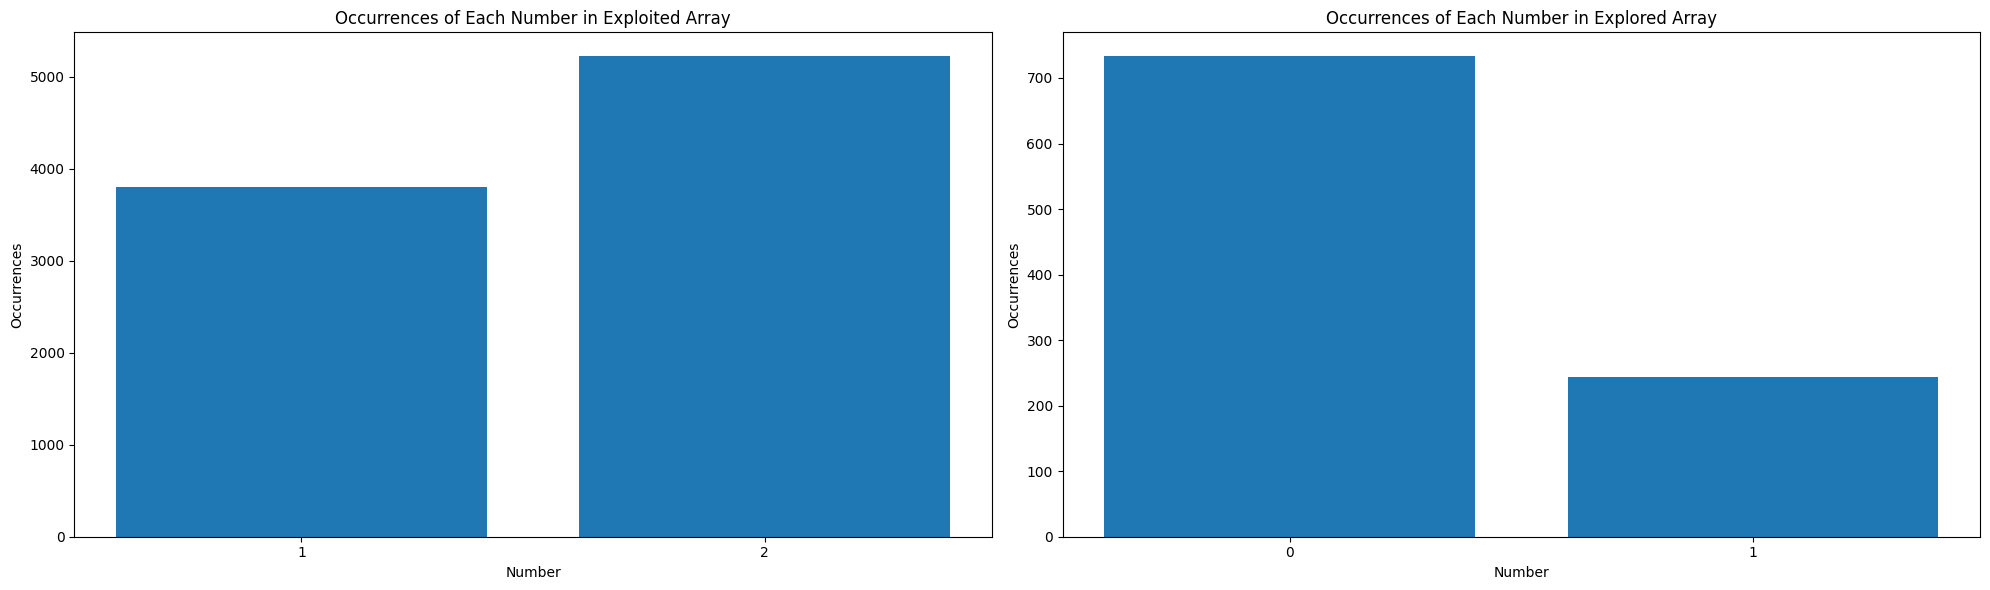

In [10]:
from collections import Counter

explored = np.array( [ i for i in r['history'] if i[0]==0 ] )
exploited = np.array( [ i for i in r['history'] if i[0]!=0  ] )

# Counting the occurrences of each number for 'exploited'
counts_exploited = Counter(exploited[:,0])
numbers_exploited = list(counts_exploited.keys())
occurrences_exploited = list(counts_exploited.values())

# Counting the occurrences of each number for 'explored'
counts_explored = Counter(explored[:,1])
numbers_explored = list(counts_explored.keys())
occurrences_explored = list(counts_explored.values())

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for 'exploited'
axs[0].bar(numbers_exploited, occurrences_exploited)
axs[0].set_xlabel('Number')
axs[0].set_ylabel('Occurrences')
axs[0].set_title('Occurrences of Each Number in Exploited Array')
axs[0].set_xticks(numbers_exploited)

# Plot for 'explored'
axs[1].bar(numbers_explored, occurrences_explored)
axs[1].set_xlabel('Number')
axs[1].set_ylabel('Occurrences')
axs[1].set_title('Occurrences of Each Number in Explored Array')
axs[1].set_xticks(numbers_explored)

# Show the plot
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

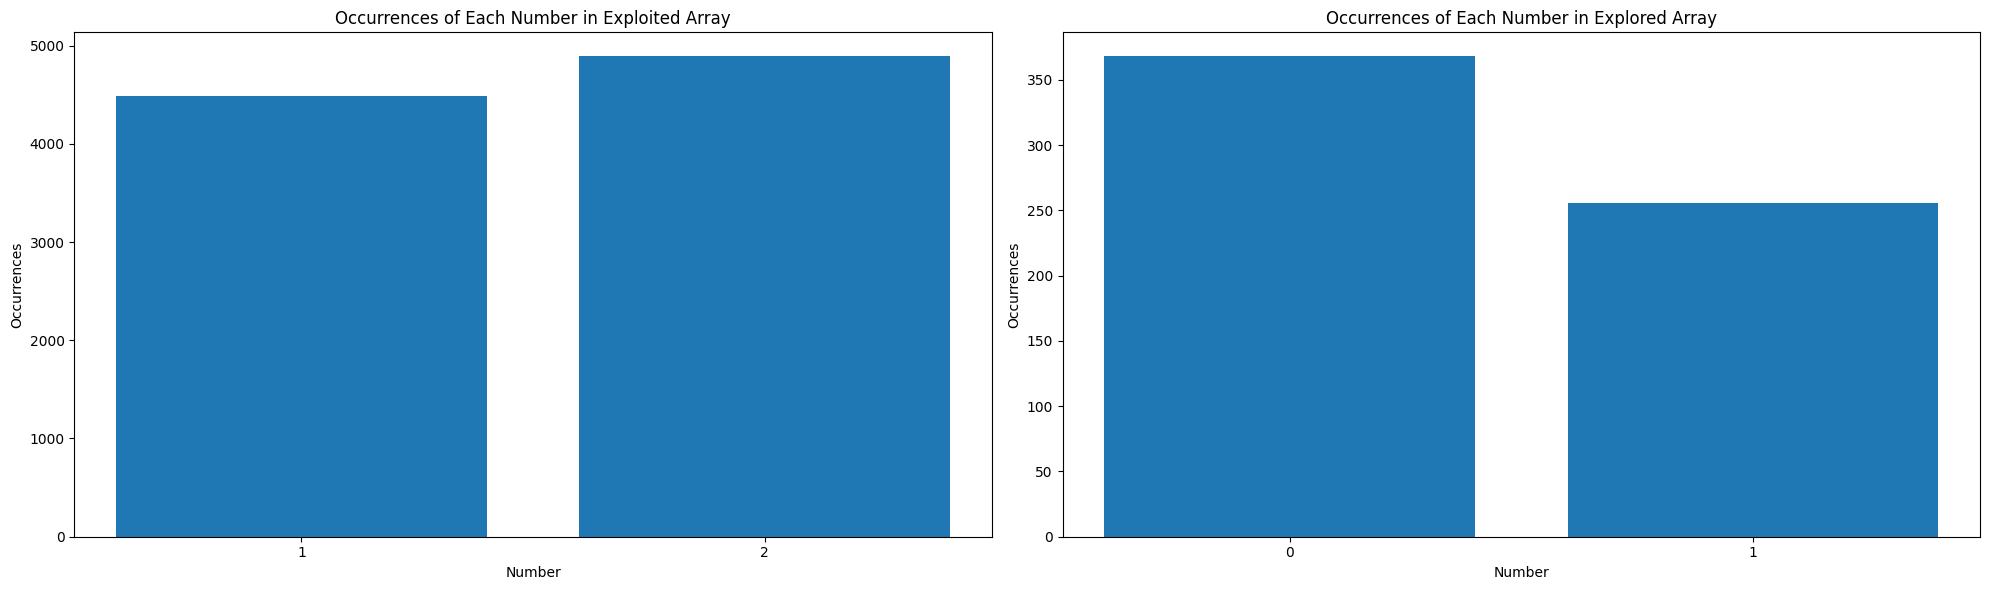

In [13]:
from collections import Counter

explored = np.array( [ i for i in r['history'] if i[0]==0 ] )
exploited = np.array( [ i for i in r['history'] if i[0]!=0  ] )

# Counting the occurrences of each number for 'exploited'
counts_exploited = Counter(exploited[:,0])
numbers_exploited = list(counts_exploited.keys())
occurrences_exploited = list(counts_exploited.values())

# Counting the occurrences of each number for 'explored'
counts_explored = Counter(explored[:,1])
numbers_explored = list(counts_explored.keys())
occurrences_explored = list(counts_explored.values())

# Create a figure and a set of subplots
fig, axs = plt.subplots(1, 2, figsize=(20, 6))  # 1 row, 2 columns

# Plot for 'exploited'
axs[0].bar(numbers_exploited, occurrences_exploited)
axs[0].set_xlabel('Number')
axs[0].set_ylabel('Occurrences')
axs[0].set_title('Occurrences of Each Number in Exploited Array')
axs[0].set_xticks(numbers_exploited)

# Plot for 'explored'
axs[1].bar(numbers_explored, occurrences_explored)
axs[1].set_xlabel('Number')
axs[1].set_ylabel('Occurrences')
axs[1].set_title('Occurrences of Each Number in Explored Array')
axs[1].set_xticks(numbers_explored)

# Show the plot
plt.tight_layout()  # Adjusts the plots to fit into the figure area.
plt.show()

In [ ]:


def obtain_probability(t , factor):

    K = 100
    # sigma = K/(t+1)**(1/2)
    sigma = K/np.log(t+1)
    epsilon = 10e-7

    def divide_interval(start, end, k):
        intervals = np.linspace(start, end, k).tolist()
        return intervals

    # U = np.sqrt( self.alpha  * np.log(t) ) 

    U =  factor
    rhos = divide_interval(0, U, K)
    p_m_hat =  np.array([ np.exp( -rhos[i]**2 / ( 2*(sigma**2) )  )  for i in range(len(rhos)-1) ] )
    p_m = ( (1 - epsilon) * p_m_hat ) / p_m_hat.sum()
    p_m = p_m.tolist()
    p_m.append(epsilon)
        
    Z = np.random.choice(rhos, p= p_m)
    return Z

deterministic = []
rand = []

for t in range(1, 10000):
    sigma_i = 2
    d = 730
    N = 3
    H = 1
    lbd_reg = 1
    factor = sigma_i * (  np.sqrt( 2 * ( d  * np.log( 1 + t * np.log(N * H)/lbd_reg ) +  np.log(1/t**2) ) ) + np.sqrt(lbd_reg) * sigma_i )
    rand_value = obtain_probability(t , factor)
    deterministic.append(factor)
    rand.append(rand_value)


plt.plot(range(1,10000), deterministic, '.', markersize = 1)

plt.plot(range(1,10000), rand, '.', markersize = 1)

plt.savefig('vara2k100.png')

In [ ]:
plt.hist(rand, bins = 10)

In [ ]:
context_generator = synthetic_data.QuinticContexts(  )
context_generator.set_b(0)
context_generator.normalization()

V_it_inv = np.identity(20)

vals = []
rates = []

T = 10000

for t in range(1,T):

    norm_context, distribution = context_generator.get_context(True)
    dist_test.append(distribution)
    outcome = np.random.choice( 2 , p = distribution ) 

    latent_X = alg.func( torch.from_numpy( norm_context ).float().to(alg.device) ).cpu().detach().numpy()

    V_it_inv = V_it_inv - ( V_it_inv @ latent_X.T @ latent_X @ V_it_inv ) / ( 1 + latent_X @ V_it_inv @ latent_X.T ) 

    val =  latent_X @ V_it_inv @ latent_X.T  
    rate = t**(2/3)  * ( 1.01 * np.log(t) )**(1/3)

    vals.append(val[0][0])
    rates.append(1/rate)

plt.plot(range(1,T), vals, '.' , markersize = 0.01, color = 'blue', label = 'pseudo-count')
plt.plot(range(1,T), rates, '.', markersize = 0.01, color = 'red', label = 'exploration threshold')
plt.yscale('log')
plt.legend()